In [55]:
import sys
import os
from scipy import stats
from gapminder import gapminder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the Data

In [56]:
df = pd.read_csv('E:\Mega Drive\Mater\Python_Scripts\Beta_Code\diabetes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Explore the dataset

In [57]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Predictor** and **Target** Variables

In [58]:
X = df[['BMI', 'Age', 'Pregnancies']].values
y = df[['Outcome']].values

In [59]:
print(X.shape, y.shape)

(768, 3) (768, 1)


# Create training and test set

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Instantiate a k-NN classifier: knn with an arbitrary number of clusters

In [61]:
knn = KNeighborsClassifier(n_neighbors=6)

Fit the classifier to the training data

In [62]:
knn.fit(X_train, y_train.ravel())

KNeighborsClassifier(n_neighbors=6)

Predict the labels of the test data: y_pred

In [63]:
y_pred = knn.predict(X_test)

Generate the confusion matrix and classification report

In [64]:
print(confusion_matrix(y_test, y_pred))

[[166  40]
 [ 54  48]]


In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       206
           1       0.55      0.47      0.51       102

    accuracy                           0.69       308
   macro avg       0.65      0.64      0.64       308
weighted avg       0.69      0.69      0.69       308



# Building a logistic regression model

In [66]:
from sklearn.linear_model import LogisticRegression

Create the classifier: logreg

In [67]:
logreg = LogisticRegression()

 Fit the classifier to the training data

In [68]:
logreg.fit(X_train, y_train.ravel())

LogisticRegression()

Predict the labels of the test set: y_pred

In [69]:
y_pred = logreg.predict(X_test)

Compute and print the **confusion matrix** and **classification report**

In [70]:
print(confusion_matrix(y_test, y_pred))

[[163  43]
 [ 65  37]]


In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75       206
           1       0.46      0.36      0.41       102

    accuracy                           0.65       308
   macro avg       0.59      0.58      0.58       308
weighted avg       0.63      0.65      0.64       308



# Plotting an ROC curve

Classification reports and confusion matrices are great methods to quantitatively evaluate model performance, <br>
while ROC curves provide a way to visually evaluate models. 

In [72]:
from sklearn.metrics import roc_curve

.predict_proba() method which returns the probability of a given sample being in a particular class. 

Using the logreg classifier, which has been fit to the training data, compute the predicted probabilities of the <br>
labels of the test set X_test

In [73]:
y_pred_prob = logreg.predict_proba(X_test)[:,1]

Generate ROC curve values: **FalsePositiveRate (fpr), TruePositiveRate (tpr), thresholds**

In [74]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

**Plot ROC curve**

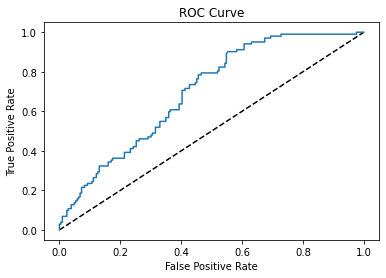

In [75]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

**AUC computation**

If we have a binary classifier that in fact is just randomly making guesses. It would be correct 
approximately 50% of the time, and the resulting ROC curve would be a diagonal line in which the 
True Positive Rate and False Positive Rate are always equal. The Area under this ROC curve would 
be 0.5. This is one way in which the AUC is an informative metric 
to evaluate a model. If the AUC is greater than 0.5, the model is better than random guessing.

In [76]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

Compute and print AUC score

In [77]:
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.6981010850942317


Compute cross-validated AUC scores: cv_auc

In [78]:
cv_auc = cross_val_score(logreg, X, y.ravel(), cv=5, scoring='roc_auc')

Print list of AUC scores

In [79]:
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC scores computed using 5-fold cross-validation: [0.75407407 0.72166667 0.71092593 0.76603774 0.72339623]
